In [3]:
from datetime import datetime
import yfinance as yf
import calendar
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def add_months(start_date, months):
    """
    Add `months` to start_date. Handles month/year wrap and end-of-month correctly.
    """
    total_months = start_date.year * 12 + (start_date.month - 1) + months
    new_year = total_months // 12
    new_month = (total_months % 12) + 1
    _, last_day = calendar.monthrange(new_year, new_month)
    new_day = min(start_date.day, last_day)
    return datetime(new_year, new_month, new_day)

def parse_year_date(s):
    s = s.strip().lower()
    if s.endswith('m'):
        months = int(s[:-1])
    elif s.endswith('y'):
        years = int(s[:-1])
        months = years * 12
    else:
        raise ValueError("Input must end with 'm' or 'y' (e.g. '3m' or '1y').")
    if months < 0:
        raise ValueError("Months/years must be non-negative.")
    return months

def generate_ranges_for_years(year_start, year_end, base_month, base_day, months_to_add):
    """
    Generate date ranges for each year between year_start and year_end.
    """
    results = []
    for y in range(year_start, year_end + 1):
        _, last_day = calendar.monthrange(y, base_month)
        start_day = min(base_day, last_day)
        start_date = datetime(y, base_month, start_day)
        end_date = add_months(start_date, months_to_add)
        results.append(f"{start_date.strftime('%Y-%m-%d')} - {end_date.strftime('%Y-%m-%d')}")
    return results

def fetch_stock_data(ticker, date_ranges):
    stock_data_list = []
    for date_range in date_ranges:
        start_date_str, end_date_str = date_range.split(" - ")
        stock_data = yf.download(ticker, start=start_date_str, end=end_date_str)[['Close']]
        stock_data['Daily Change'] = stock_data['Close'].pct_change() * 100  # Calculate percentage change
        stock_data['Date'] = stock_data.index  # Store the date as a column
        stock_data = stock_data[['Date', 'Close', 'Daily Change']]  # Select relevant columns
        stock_data_list.append(stock_data)
    return stock_data_list


In [5]:
if __name__ == '__main__':
    user_input = input("Enter months or years (e.g., '6m' or '1y'): ").strip().lower()
    months_to_add = parse_year_date(user_input)

    today = datetime.today()
    base_month = today.month
    base_day = today.day

    YEAR_START = 1980
    YEAR_END = today.year  # up to current year

    ranges = generate_ranges_for_years(YEAR_START, YEAR_END, base_month, base_day, months_to_add)

    print(f"\nBase (today): {today.strftime('%Y-%m-%d')}")
    if user_input.endswith('m'):
        print(f"Adding {months_to_add} months per range.")
    else:
        print(f"Adding {months_to_add} months (from {user_input}) per range.")


    
    # // Print the list of ranges
    # // print("\nRanges List:")
    # // for r in ranges:
    # //     print(r)

    ticker = 'AAPL'  # You can change this to any valid stock ticker symbol
    # Fetch the stock data for the given ranges
    stock_data = fetch_stock_data(ticker, ranges)

    # Combine all the stock data into one DataFrame
    stock_data_df = pd.concat(stock_data, axis=0)
    stock_data_df.reset_index(drop=True, inplace=True)  # Reset index for the combined DataFrame

    # // Display the DataFrame
    # // print("\nStock Data (Date, Adj Close, Daily Change %):")
    # // print(stock_data_df)


Base (today): 2025-10-03
Adding 1 months per range.


C:\Users\vikas\AppData\Local\Temp\ipykernel_11800\2545209927.py:42: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date_str, end=end_date_str)[['Close']]
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (1d 1980-10-03 -> 1980-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 339393600, endDate = 342075600")')
C:\Users\vikas\AppData\Local\Temp\ipykernel_11800\2545209927.py:42: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date_str, end=end_date_str)[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\vikas\AppData\Local\Temp\ipykernel_11800\2545209927.py:42: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=st

In [9]:
print(stock_data_df)

Price        Date       Close Daily Change
Ticker                   AAPL             
0      1981-10-05    0.058235          NaN
1      1981-10-06    0.057807    -0.735229
2      1981-10-07    0.061232     5.925490
3      1981-10-08    0.063373     3.496335
4      1981-10-09    0.063801     0.675602
..            ...         ...          ...
969    2024-10-29  232.587540     0.115683
970    2024-10-30  229.034073    -1.527798
971    2024-10-31  224.863480    -1.820949
972    2024-11-01  221.877365    -1.327968
973    2025-10-03  258.019989          NaN

[974 rows x 3 columns]


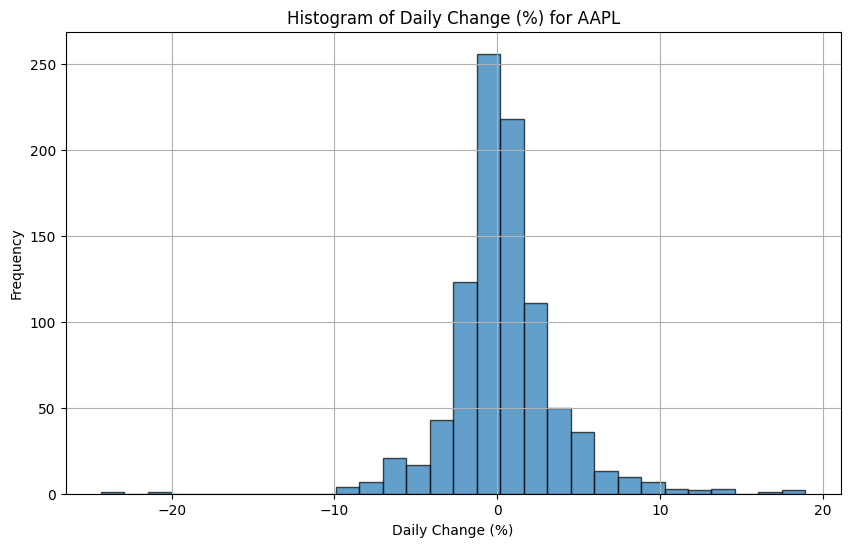

In [10]:
plt.figure(figsize=(10,6))
plt.hist(stock_data_df['Daily Change'], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of Daily Change (%) for {ticker}')
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
    